### Import the libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical, plot_model

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

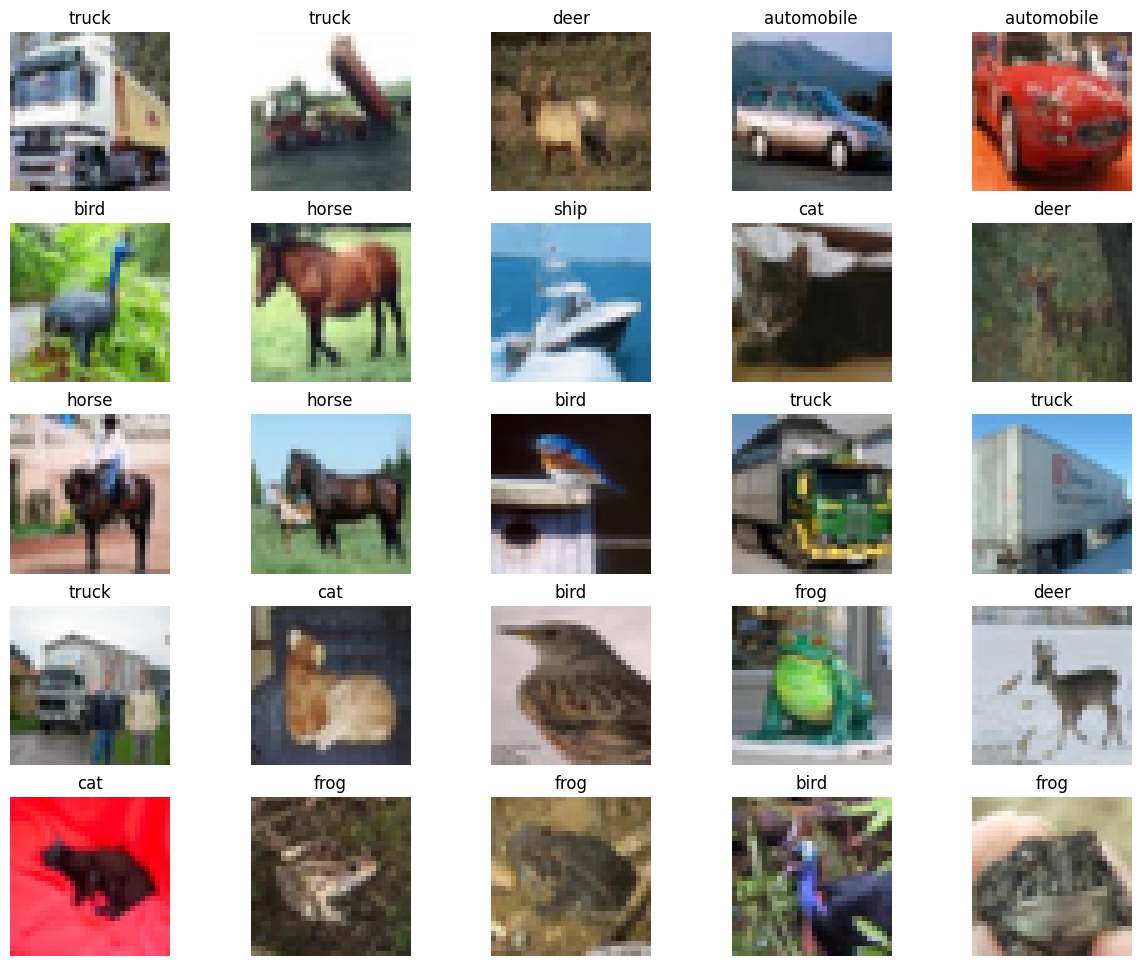

In [6]:
plt.figure(figsize=(15,12))
count=0
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(labels[y_train[i][0]])

In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [8]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

We generally normalize for distance using algorithms like SVM uses euclidean distance and standardisation for scaling ad faster performance in other algos.

In [12]:
def process_image(image, label) :
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image, (64, 64))
    return image, label

In [13]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print(f"Training dataset size: {train_ds_size}")
print(f"Test dataset size: {test_ds_size}")

Training dataset size: 50000
Test dataset size: 10000


In [14]:
train_ds = (train_ds.map(process_image).shuffle(buffer_size=train_ds_size).batch(batch_size=32, drop_remainder = True))
test_ds = (test_ds.map(process_image).shuffle(buffer_size=test_ds_size).batch(batch_size=32, drop_remainder = True))


Create AlexNet Architecture

In [15]:
model = Sequential([
    Conv2D(filters=128, input_shape=(64,64,3), kernel_size=(11,11), strides=(4,4),
                activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), activation='relu', strides=(1,1), padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3)),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu', strides=(1,1), padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(1,1), activation='relu', strides=(1,1), padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(1,1), activation='relu', strides=(1,1), padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1024, activation="relu"),
    Dropout(0.5),
    Dense(1024, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
    ])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (Batch  (None, 14, 14, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 128)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 256)         1024      
 chNormalization)                                                
                                                        

In [17]:
import keras
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_ds, epochs = 30, validation_data=test_ds)

Epoch 1/30
1562/1562 [==============================] - 24s 8ms/step - loss: 2.1321 - accuracy: 0.2562 - val_loss: 1.5980 - val_accuracy: 0.4307
Epoch 2/30
1562/1562 [==============================] - 17s 8ms/step - loss: 1.7092 - accuracy: 0.3815 - val_loss: 1.4489 - val_accuracy: 0.4831
Epoch 3/30
1562/1562 [==============================] - 18s 9ms/step - loss: 1.5336 - accuracy: 0.4484 - val_loss: 1.3160 - val_accuracy: 0.5305
Epoch 4/30
1562/1562 [==============================] - 18s 9ms/step - loss: 1.4034 - accuracy: 0.4968 - val_loss: 1.2361 - val_accuracy: 0.5562
Epoch 5/30
1562/1562 [==============================] - 18s 9ms/step - loss: 1.3040 - accuracy: 0.5342 - val_loss: 1.1827 - val_accuracy: 0.5758
Epoch 6/30
1562/1562 [==============================] - 16s 8ms/step - loss: 1.2159 - accuracy: 0.5672 - val_loss: 1.1204 - val_accuracy: 0.6025
Epoch 7/30
1562/1562 [==============================] - 17s 8ms/step - loss: 1.1409 - accuracy: 0.5954 - val_loss: 1.0708 - val_ac

In [3]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined